### 손글씨 인식 립러닝

In [1]:
# Data 불러오기
import pandas as pd

train = pd.read_csv("/kaggle/input/data-mnist/train_20k.csv", header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
test = pd.read_csv("/kaggle/input/data-mnist/test_1k.csv", header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Data의 크기
print(train.shape)
print(test.shape)

(20001, 785)
(1001, 785)


----
### Preprocessing (전처리)

In [4]:
# train의 결측치 확인
train.isnull().sum().sum()

0

In [5]:
# test의 결측치 확인
test.isnull().sum().sum()

0

In [6]:
# Target의 분포 확인  - 1
targetCount = []

for i in sorted(train[0].unique()):
    print(i, ":", len(train[train[0]==i]))
    targetCount.append(len(train[train[0]==i]))
    
print(targetCount)

0 : 1994
1 : 2281
2 : 1929
3 : 2076
4 : 1945
5 : 1776
6 : 1971
7 : 2093
8 : 1922
9 : 2014
[1994, 2281, 1929, 2076, 1945, 1776, 1971, 2093, 1922, 2014]


In [7]:
min(targetCount) / max(targetCount)

0.7786058746163963

In [8]:
import numpy as np

targetCount = np.unique(train[0], return_counts=True)
targetCount

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1994, 2281, 1929, 2076, 1945, 1776, 1971, 2093, 1922, 2014]))

In [9]:
np.min(targetCount[1]) / np.max(targetCount[1])

0.7786058746163963

> Target이 성립됨

### train의 data와 target 구분하기

In [10]:
# train의 data 구성하기 
train_data = train.iloc[:,1:]
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# train의 target 구성하기
train_target = train.iloc[:,:1]
train_target.head()

,0
0,5
1,0
2,4
3,1
4,9


---
### test의 data와 target 구분하기

In [12]:
# test의 data 구성하기
test_data = test.iloc[:,1:]
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# test의 target 구성하기
test_target = test.iloc[:,:1]
test_target.head()

,0
0,7
1,2
2,1
3,0
4,4


---
### Data를 Tensor로 변환

In [14]:
import torch

In [15]:
train_input = torch.tensor(train_data.values)
train_target = torch.tensor(train_target.values)
test_input = torch.tensor(test_data.values)
test_target = torch.tensor(test_target.values)

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

torch.Size([20001, 784])
torch.Size([20001, 1])
torch.Size([1001, 784])
torch.Size([1001, 1])


---
### 이미지 확인을 위해 Data들의 차원 변경

In [16]:
# 2차원으로 구성되어 있는 부분 -> 이미지 장수, 이미지 가로크기, 이미지 세로크기 로 차원 변경
train_input = train_input.reshape(-1, 28, 28)
train_target = train_target.reshape(-1,)
test_input = test_input.reshape(-1, 28, 28)
test_target = test_target.reshape(-1,)

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

torch.Size([20001, 28, 28])
torch.Size([20001])
torch.Size([1001, 28, 28])
torch.Size([1001])


In [17]:
# target data 확인
print(train_target[:10])

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


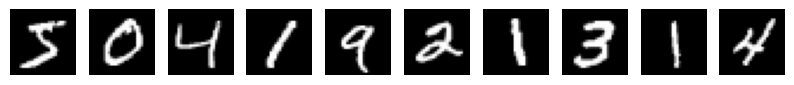

In [18]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray')
    axs[i].axis('off')

plt.show()

In [19]:
# 데이터 정규화 및 2차 행렬로 만들기 

train_scaled = (train_input / 255.0).reshape(-1, 28*28)
test_scaled = (test_input / 255.0).reshape(-1, 28*28)

In [20]:
# 확인
print(train_scaled.shape)
print(test_scaled.shape)

torch.Size([20001, 784])
torch.Size([1001, 784])


### train data를 훈련데이터와 검증데이터로 나누기

In [21]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = \
                            train_test_split(
                                train_scaled,
                                train_target,
                                test_size=0.2,
                                random_state=42
                            )

In [22]:
# 확인
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

torch.Size([16000, 784]) torch.Size([16000])
torch.Size([4001, 784]) torch.Size([4001])


In [23]:
train_scaled

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

----
### Deep Learing 구현하기

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [25]:
# Dataset 및 DataLoader 생성
batch_size = 32 
train_dataset = TensorDataset(train_scaled, train_target)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(val_scaled, val_target)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


----
### 모델 정의 
: 입력층 -> 은닉층(활성화 함수) -> 출력층 

In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x 

In [28]:
# Instance 
model = NeuralNetwork().to(device)

In [30]:
# 역방향 : 손실함수와 옵티마이저 
criterion = nn.CrossEntropyLoss() # 손실 함수 
optimizer = optim.Adam(model.parameters())

### 학습 함수

In [32]:
# 학습 함수 정의
def train(model, train_loader, criterion, optimizer, device):
    model.train() # 뉴런들이 훈련모드로 동작하도록 설정 
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # 이전 반복에서 계산된 그래디언트를 초기화 
        outputs = model(inputs) # 내부적으로 model.forward(inputs) 호출하여 예측값 얻음 
        loss = criterion(outputs, targets) # 모델의 예측값과 실제 타겟 간의 손실을 계산 
        loss.backward() # 손실에 대한 그래디언트를 계산하고 역전파 
        optimizer.step() # 계산된 그래디언트를 사용하고 모델의 파라미터를 업데이트 
    return loss.item() # 현재 배치의 손실값을 반환 

In [33]:
# 평가함수 
def evaluate(model, val_loader, criterion, device):
    model.eval() # 평가모드로 동작하도록 설정 
    total_loss = 0 # 전체 손실 합계 
    correct = 0 # 정확하게 예측한 샘플 수 
    total = 0 # 전체 샘플 수
    with torch.no_grad() : # 평가 중에는 그래디언트 계산이 필요 없으므로 메모리 사용량 및 연산 속도 향상
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs) # 예측값 발생 
            loss = criterion(outputs, targets) # 손실계산
            total_loss += loss.item() # 전체 손실에 더하기 
            _, predicted = outputs.max(1) # 전체 샘플에 대해 가장 높은 확률을 가진 인덱스 
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item() # 예측값과 실제값이 일치하는 경우 True를 발생 
        return total_loss/len(val_loader), correct/total # 평균손실과 정확도 

---
### 학습 및 평가 실행

In [34]:
model.to(device)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [35]:
# 훈련 하기
num_epochs = 100

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    print(f"Epoch[{epoch+1}/{num_epochs}], Loss :{train_loss:.4f}")

Epoch[1/100], Loss :1.5546
Epoch[2/100], Loss :1.5530
Epoch[3/100], Loss :1.5121
Epoch[4/100], Loss :1.5212
Epoch[5/100], Loss :1.4747
Epoch[6/100], Loss :1.4735
Epoch[7/100], Loss :1.4622
Epoch[8/100], Loss :1.4613
Epoch[9/100], Loss :1.4615
Epoch[10/100], Loss :1.4674
Epoch[11/100], Loss :1.5082
Epoch[12/100], Loss :1.4799
Epoch[13/100], Loss :1.4982
Epoch[14/100], Loss :1.4925
Epoch[15/100], Loss :1.4653
Epoch[16/100], Loss :1.4869
Epoch[17/100], Loss :1.4896
Epoch[18/100], Loss :1.4721
Epoch[19/100], Loss :1.4612
Epoch[20/100], Loss :1.5228
Epoch[21/100], Loss :1.4917
Epoch[22/100], Loss :1.4956
Epoch[23/100], Loss :1.4613
Epoch[24/100], Loss :1.4618
Epoch[25/100], Loss :1.4622
Epoch[26/100], Loss :1.4656
Epoch[27/100], Loss :1.4613
Epoch[28/100], Loss :1.4619
Epoch[29/100], Loss :1.4622
Epoch[30/100], Loss :1.4926
Epoch[31/100], Loss :1.4612
Epoch[32/100], Loss :1.4836
Epoch[33/100], Loss :1.4612
Epoch[34/100], Loss :1.4613
Epoch[35/100], Loss :1.4613
Epoch[36/100], Loss :1.4612
E

In [36]:
# 훈련 평가
train_loss, train_accuracy = evaluate(model, train_loader, criterion, device)
print(f"Loss : {train_loss:.4f}, Accuracy : {train_accuracy:.4f}")

Loss : 1.4649, Accuracy : 0.9962


In [37]:
# 검증 평가
val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
print(f"Loss : {val_loss:.4f}, Accuracy : {val_accuracy:.4f}")

Loss : 1.4880, Accuracy : 0.9735


In [38]:
# 일반화 평가
test_dataset = TensorDataset(test_scaled, test_target)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
print(f"Loss : {test_loss:.4f}, Accuracy : {test_accuracy:.4f}")

Loss : 1.4899, Accuracy : 0.9720


---
### 예측 함수

In [39]:
def predict(model, data_loader, device):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs,_ in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            predictions.extend(predicted.cpu().numpy())
        return predictions

In [40]:
# 예측 실행
test_dataset = TensorDataset(test_scaled, test_target)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
predictions = predict(model, test_loader, device)

In [41]:
# 결과 출력
print("예측 결과 : 처음부터 10개")
print(test_target[:10])
print(predictions[:10])

예측 결과 : 처음부터 10개
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


----
### Image 만들기

In [42]:
from PIL import Image

In [43]:
# train_data의 크기 
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train_data.shape

(20001, 784)

In [45]:
train_data.iloc[50,:]

1      0
2      0
3      0
4      0
5      0
      ..
780    0
781    0
782    0
783    0
784    0
Name: 50, Length: 784, dtype: int64

In [47]:
# train_data의 50번째
abc = np.array(train_data.iloc[50]).reshape(28, 28)
abc.shape

(28, 28)

In [48]:
abc

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [50]:
# Image 만들기
image = Image.fromarray(abc.astype(np.uint8))
image

In [51]:
# Image 저장하기
image.save("./mnist_test_3.jpg", "JPEG")

---
#### 이미지를 불러와서 Predict 해보기

In [52]:
# Image 불러오기
img = Image.open("./mnist_test_3.jpg")
img

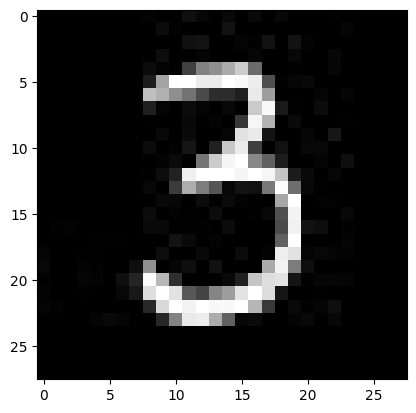

In [53]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
plt.show()

In [54]:
# img를 numpy array로 변환
imgArray = np.array(img)
imgArray

array([[  0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,  15,   6,
          0,   8,   0,   9,   0,   7,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  11,   2,   0,   0,
          0,  18,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  19,
          0,   0,   5,   2,  18,   0,  18,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  13,   0,   0,   4,
          0,   0,   0,   6,   0,   0,   7,   0,   0,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  11,   3,   1,  64, 129,
        143, 170, 204, 107,   0,   0,   1,   0,   0,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  28, 164, 254, 255, 236,
        235, 255, 249, 237,  79,   2,   6,   8,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [57]:
# img를 1차원 배열로 변경하기 
imgArray2 = imgArray.reshape(1,-1) # 힉습한 Image 데이터가 2차원으로 되어 있어서 변경
imgArray2

array([[  0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,  15,   6,
          0,   8,   0,   9,   0,   7,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,   2,
          0,   0,   0,  18,   0,   0,   0,   0,   0,   0,   0,   0,   5,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  19,   0,   0,   5,   2,  18,   0,  18,   3,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,   0,   0,   4,   0,   0,   0,   6,   0,   0,   7,
          0,   0,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  11,   3,   1,  64, 129, 143, 170, 204, 107,   0,
          0,   1,   0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  28, 164, 254, 255, 236, 235, 255, 249,
        237,  79,   2,   6,   8,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 191, 177

In [58]:
imgArray2.shape

(1, 784)

In [59]:
# numpy 배열을 torch로 변환 
img_input = torch.tensor(imgArray2)
img_input

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,  15,   6,   0,
           8,   0,   9,   0,   7,   0,   0,   0,   1,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,  11,   2,   0,   0,   0,
          18,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  19,   0,
           0,   5,   2,  18,   0,  18,   3,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,  13,   0,   0,   4,   0,
           0,   0,   6,   0,   0,   7,   0,   0,   7,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,  11,   3,   1,  64, 129, 143,
         170, 204, 107,   0,   0,   1,   0,   0,   6,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,  28, 164, 254, 255, 236, 235,
         255, 249, 237,  79,   2,   6,   8,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0, 191

In [60]:
img_input.shape

torch.Size([1, 784])

In [61]:
# 정규화 
img_input = img_input / 255.0
img_input.shape

torch.Size([1, 784])

In [67]:
# 단일 데이터의 예측 함수 
def predictOne(model, inputs, device):
    model.eval()
    predictions = []
    with torch.no_grad():
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        predictions.extend(predicted.cpu().numpy())
    return predictions

In [68]:
predictOne(model, img_input, device)

[3]